Feature weight in Random Forest algorithm

WARNING- this code may not work due to the file paths that had to be changed to allow
easy execution of the main module needed for project submission.
If this happens, please change the file paths in 'helpers/data_loader.py' to the following:
    TRAIN_DATA_PATH = "./../data/train_set_0520.csv"
    CODE_PATH = "./../data/code_data.csv"
    CODE_LONG_PATH = "./../data/code_javadoc.txt"
    FUNCTIONAL_TYPES = "./../data/functional_types.csv"
    PYTHON_DATA = "./../data/python_data.csv"

/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['comment'] = x['comment'].apply(DataProcesser.remove_stopwords)
/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['comment'] = x['comment'].apply(DataProcesser.remove_stopwords)


Accuracy Score : 0.6737804878048781
Precision Score : 0.9370629370629371
Recall Score : 0.5775862068965517
F1 Score : 0.7146666666666667
Matthews_corrcoef: 0.44393980895962204
Balanced accuracy score: 0.7419181034482758
Confusion matrix: 
[[ 87   9]
 [ 98 134]]


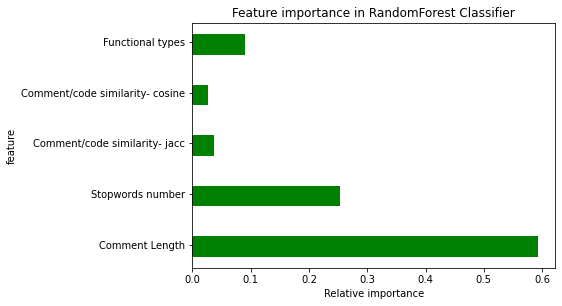

<Figure size 360x360 with 0 Axes>

In [3]:
from models.model_exec import ModelExec
import numpy as np
import matplotlib.pyplot as plt

model_exec = ModelExec()
model = model_exec.execute_model('RandomForest')
model = model.get_model()

def get_plot_weight(col):
    y = model.feature_importances_
    # plot
    fig, ax = plt.subplots()
    width = 0.4  # the width of the bars
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="green")
    ax.set_yticks(ind + width / 10)
    ax.set_yticklabels(col, minor=False)

    plt.title("Feature importance in RandomForest Classifier")
    plt.xlabel("Relative importance")
    plt.ylabel("feature")
    plt.figure(figsize=(5, 5))
    fig.set_size_inches(6.5, 4.5, forward=True)

get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity- jacc", "Comment/code similarity- cosine", "Functional types"])

Feature weight in Random Forest algorithm with comments

In [4]:
model_exec = ModelExec(include_comments=True)
model = model_exec.execute_model('RandomForest')
model = model.get_model
get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity", "Comments"])


/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['comment'] = x['comment'].apply(DataProcesser.remove_stopwords)
/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['comment'] = x['comment'].apply(DataProcesser.remove_stopwords)


Accuracy Score : 0.6707317073170732
Precision Score : 0.918918918918919
Recall Score : 0.5862068965517241
F1 Score : 0.7157894736842105
Matthews_corrcoef: 0.42170455449639993
Balanced accuracy score: 0.7306034482758621
Confusion matrix: 
[[ 84  12]
 [ 96 136]]


AttributeError: 'function' object has no attribute 'feature_importances_'

Get decision trees in Random Forest algorithm

In [ ]:
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz

export_graphviz(estimator,
                out_file='tree.dot',
                feature_names = ["Comment Length", "Stopwords number", "Comment/code similarity"],
                class_names = ['non-information: yes', 'non-information: no'],
                rounded = True, proportion = False,
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image

Image(filename = 'tree.png')